# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


In [84]:
df = pd.read_csv("data/pwd.csv")

In [85]:
df.head()

,password
0,kzde5577
1,kino3434
2,visi7k1yr
3,megzy123
4,lamborghin1


In [86]:
df.isnull().sum()

password    1
dtype: int64

In [87]:
df = df.dropna()

In [88]:
c= df.duplicated().sum()
print(c)

319


In [89]:
df=df.drop_duplicates()

In [90]:
c= df.duplicated().sum()
print(c)

0


In [91]:
df["password"] = df["password"].apply(lambda x: x.strip())
df["password"] = df["password"].apply(lambda x: x.replace(" ", ""))

In [92]:
df["Pwd_length"] = df["password"].apply(len)

In [93]:
df.head()

,password,Pwd_length
0,kzde5577,8
1,kino3434,8
2,visi7k1yr,9
3,megzy123,8
4,lamborghin1,11


In [94]:
# for counting special characters
def spec(text):
    special = 0
    for i in text:
        if not i.isalnum():
            special += 1
    return special

# for counting number in string
def number(text):
    num = 0
    for i in text:
        if i.isdigit():
            num +=1
    return num

# for counting uppercase characters
def upper(text):
    uppercase = 0
    for i in text:
        if i.isupper():
            uppercase +=1
    return uppercase

# for counting lowercase characters
def lower(text):
    lowercase = 0
    for i in text:
        if i.islower():
            lowercase +=1
    return lowercase

In [95]:
df["special_char"] = df["password"].apply(spec)
df["number"] = df["password"].apply(number)
df["upper_char"] = df["password"].apply(upper)
df["lower_char"] = df["password"].apply(lower)

In [96]:
df.head()

,password,Pwd_length,special_char,number,upper_char,lower_char
0,kzde5577,8,0,4,0,4
1,kino3434,8,0,4,0,4
2,visi7k1yr,9,0,2,0,7
3,megzy123,8,0,3,0,5
4,lamborghin1,11,0,1,0,10


In [97]:
#Deselect the password column
X = df.iloc[:,[1,2,3,4,5]].values

In [98]:
print(X)

[[ 8  0  4  0  4]
 [ 8  0  4  0  4]
 [ 9  0  2  0  7]
 ...
 [12  0  6  0  6]
 [ 9  0  2  0  7]
 [ 8  0  2  0  6]]


In [99]:
#Choosing the number of clusters
#WCSS -> Within Clusters Sum of Squares
# finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

In [100]:
print(wcss)

[15383106.69647303, 9477663.433738563, 6724940.658821656, 4789196.593739936, 4027598.6884975024, 3734313.111555501, 3280687.4119831785, 3100338.0887579857, 2839318.725191211, 2562694.3905326715]


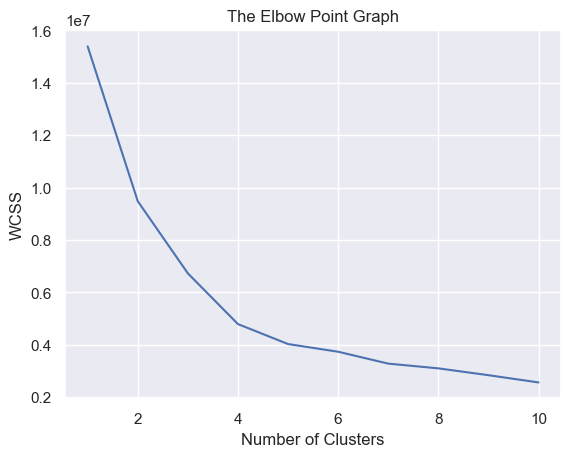

In [101]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Optimum Number of Clusters = 4

In [102]:
#Training the k-Means Clustering Model
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[3 3 2 ... 0 2 3]


In [103]:
X.shape

(669559, 5)

In [104]:
Y.shape

(669559,)

In [105]:
df['strength']=Y

In [106]:
df.head()

,password,Pwd_length,special_char,number,upper_char,lower_char,strength
0,kzde5577,8,0,4,0,4,3
1,kino3434,8,0,4,0,4,3
2,visi7k1yr,9,0,2,0,7,2
3,megzy123,8,0,3,0,5,3
4,lamborghin1,11,0,1,0,10,2


In [107]:
unique_values = df['strength'].unique()

print(unique_values)

[3 2 1 0]
